In [170]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv('./data/wine.csv')

In [171]:
df['qual_cat'] = pd.cut(df['quality'], bins = [0, 4, 7, 10],
       labels = ['low', 'medium', 'high'])

In [172]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,qual_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,medium
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,medium
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,medium


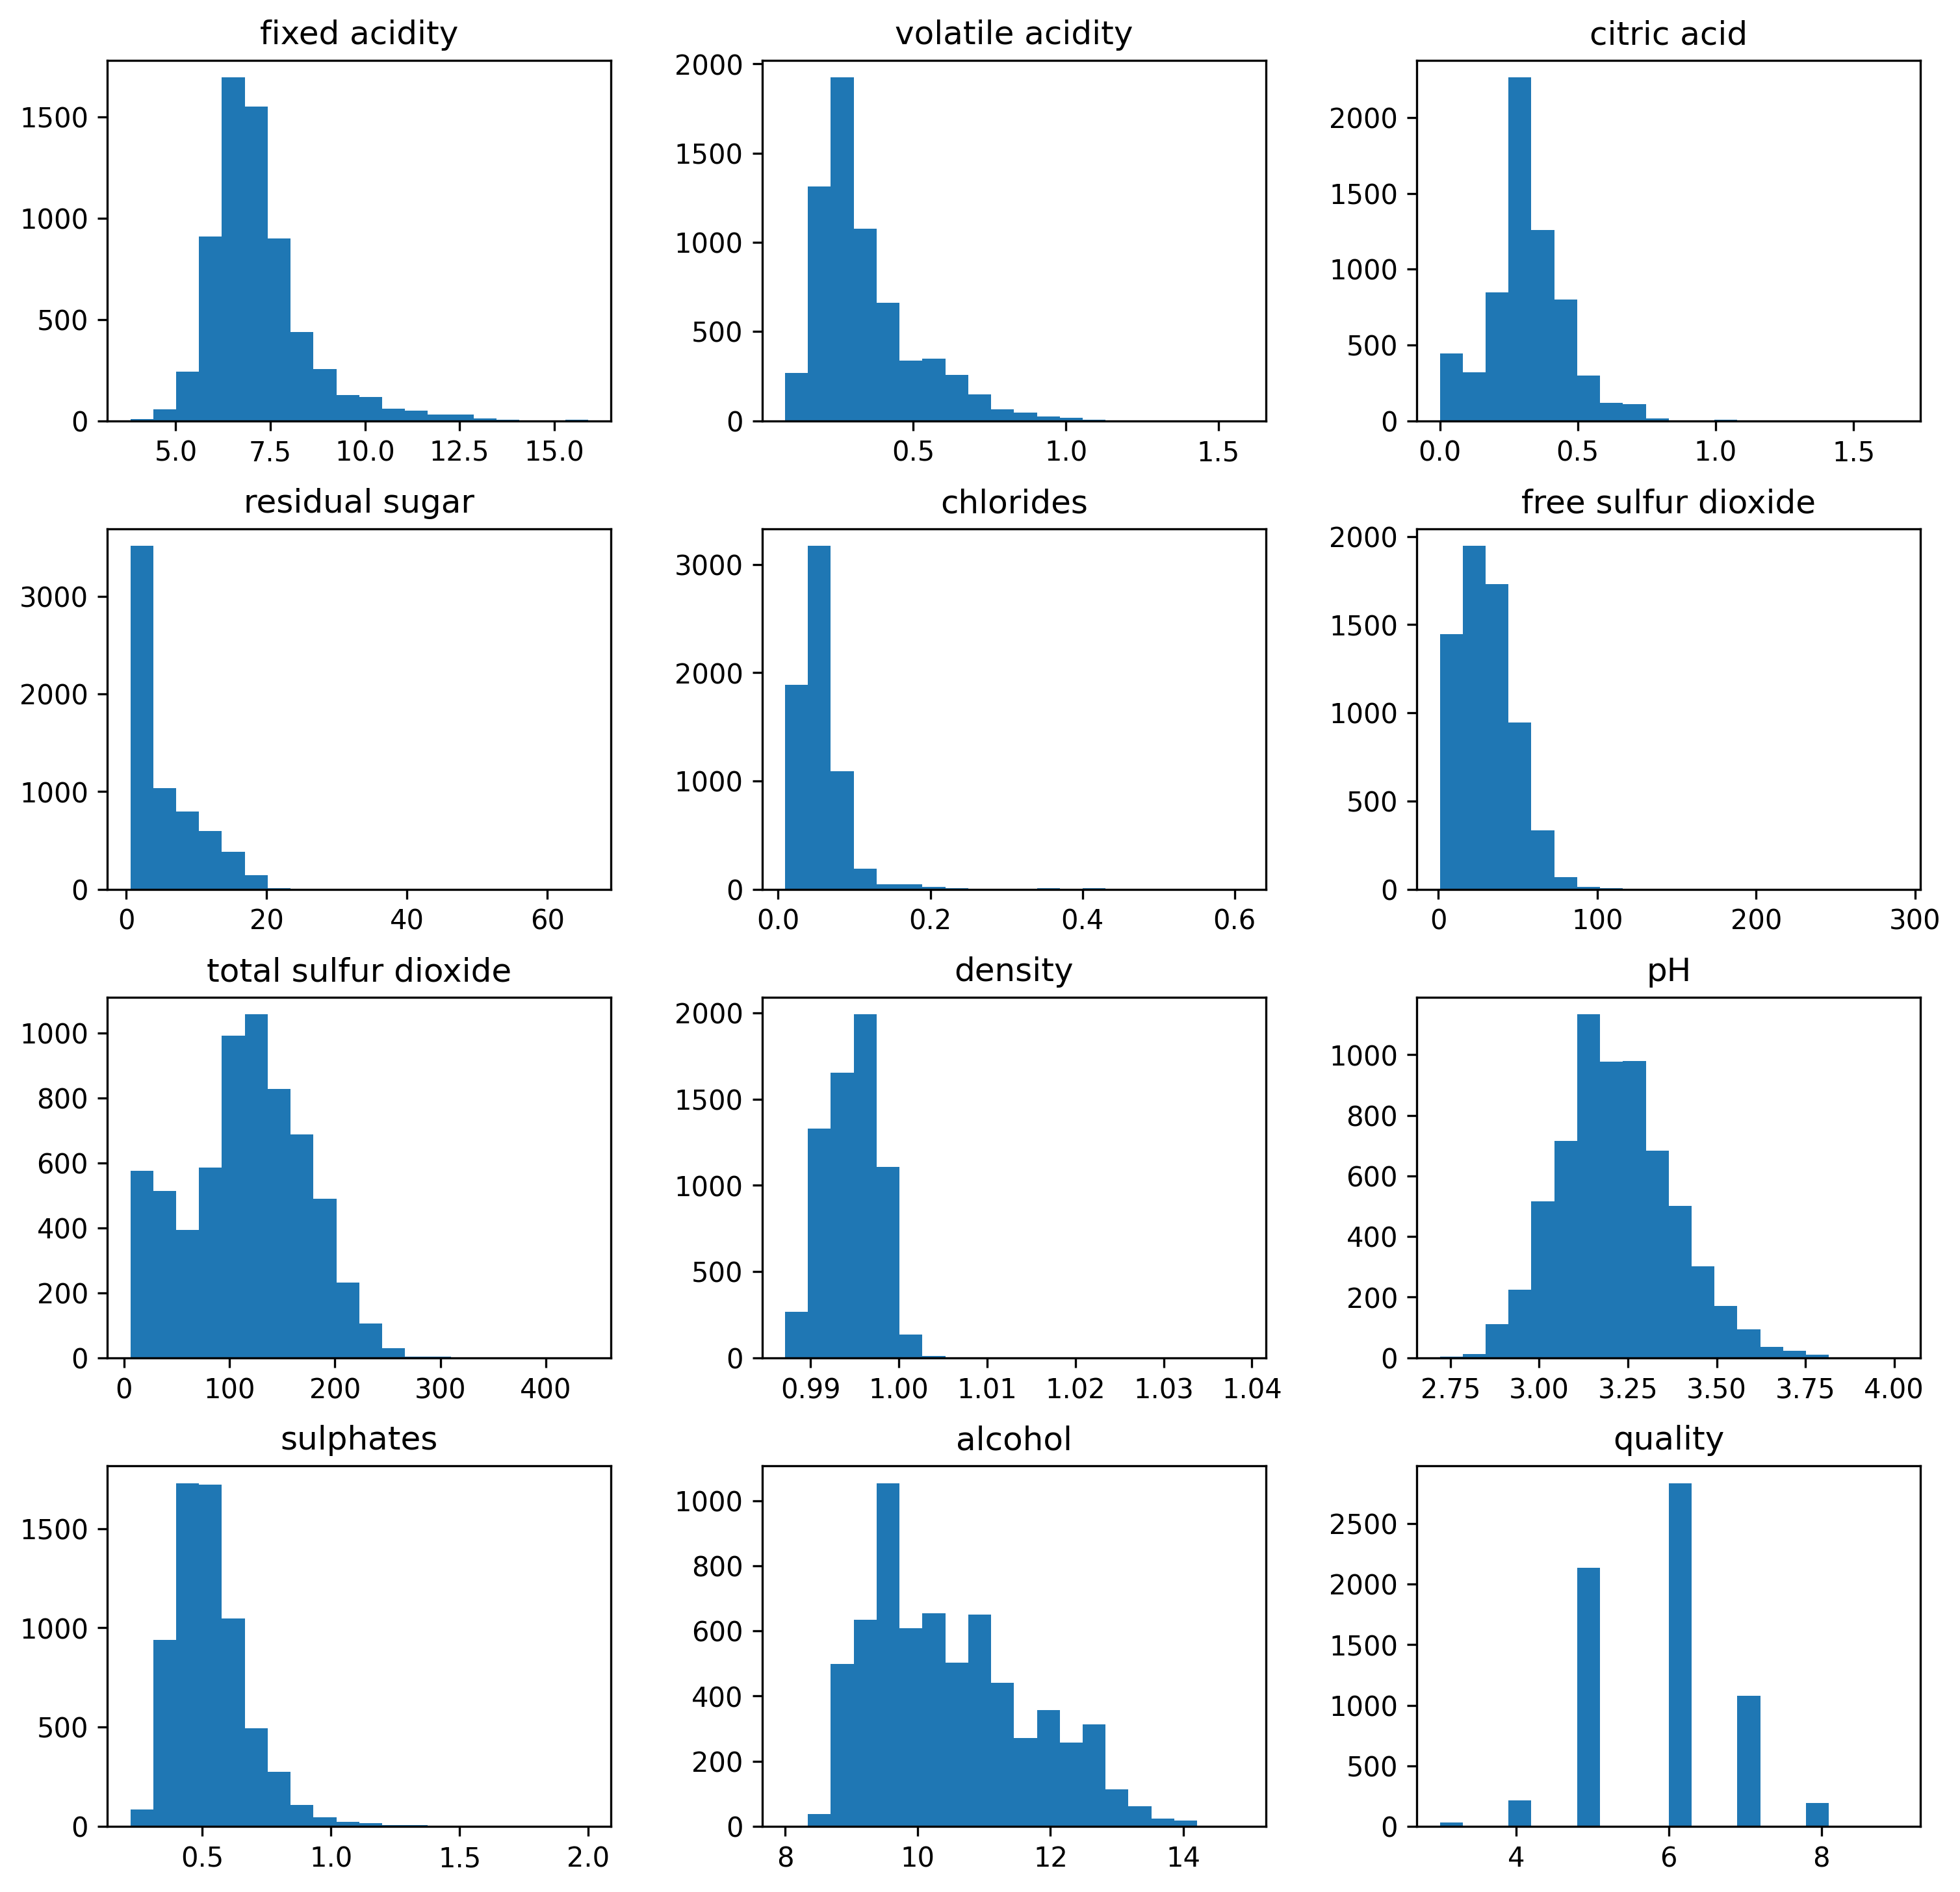

In [173]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [253]:
dv = 'citric acid'
group = 'qual_cat'

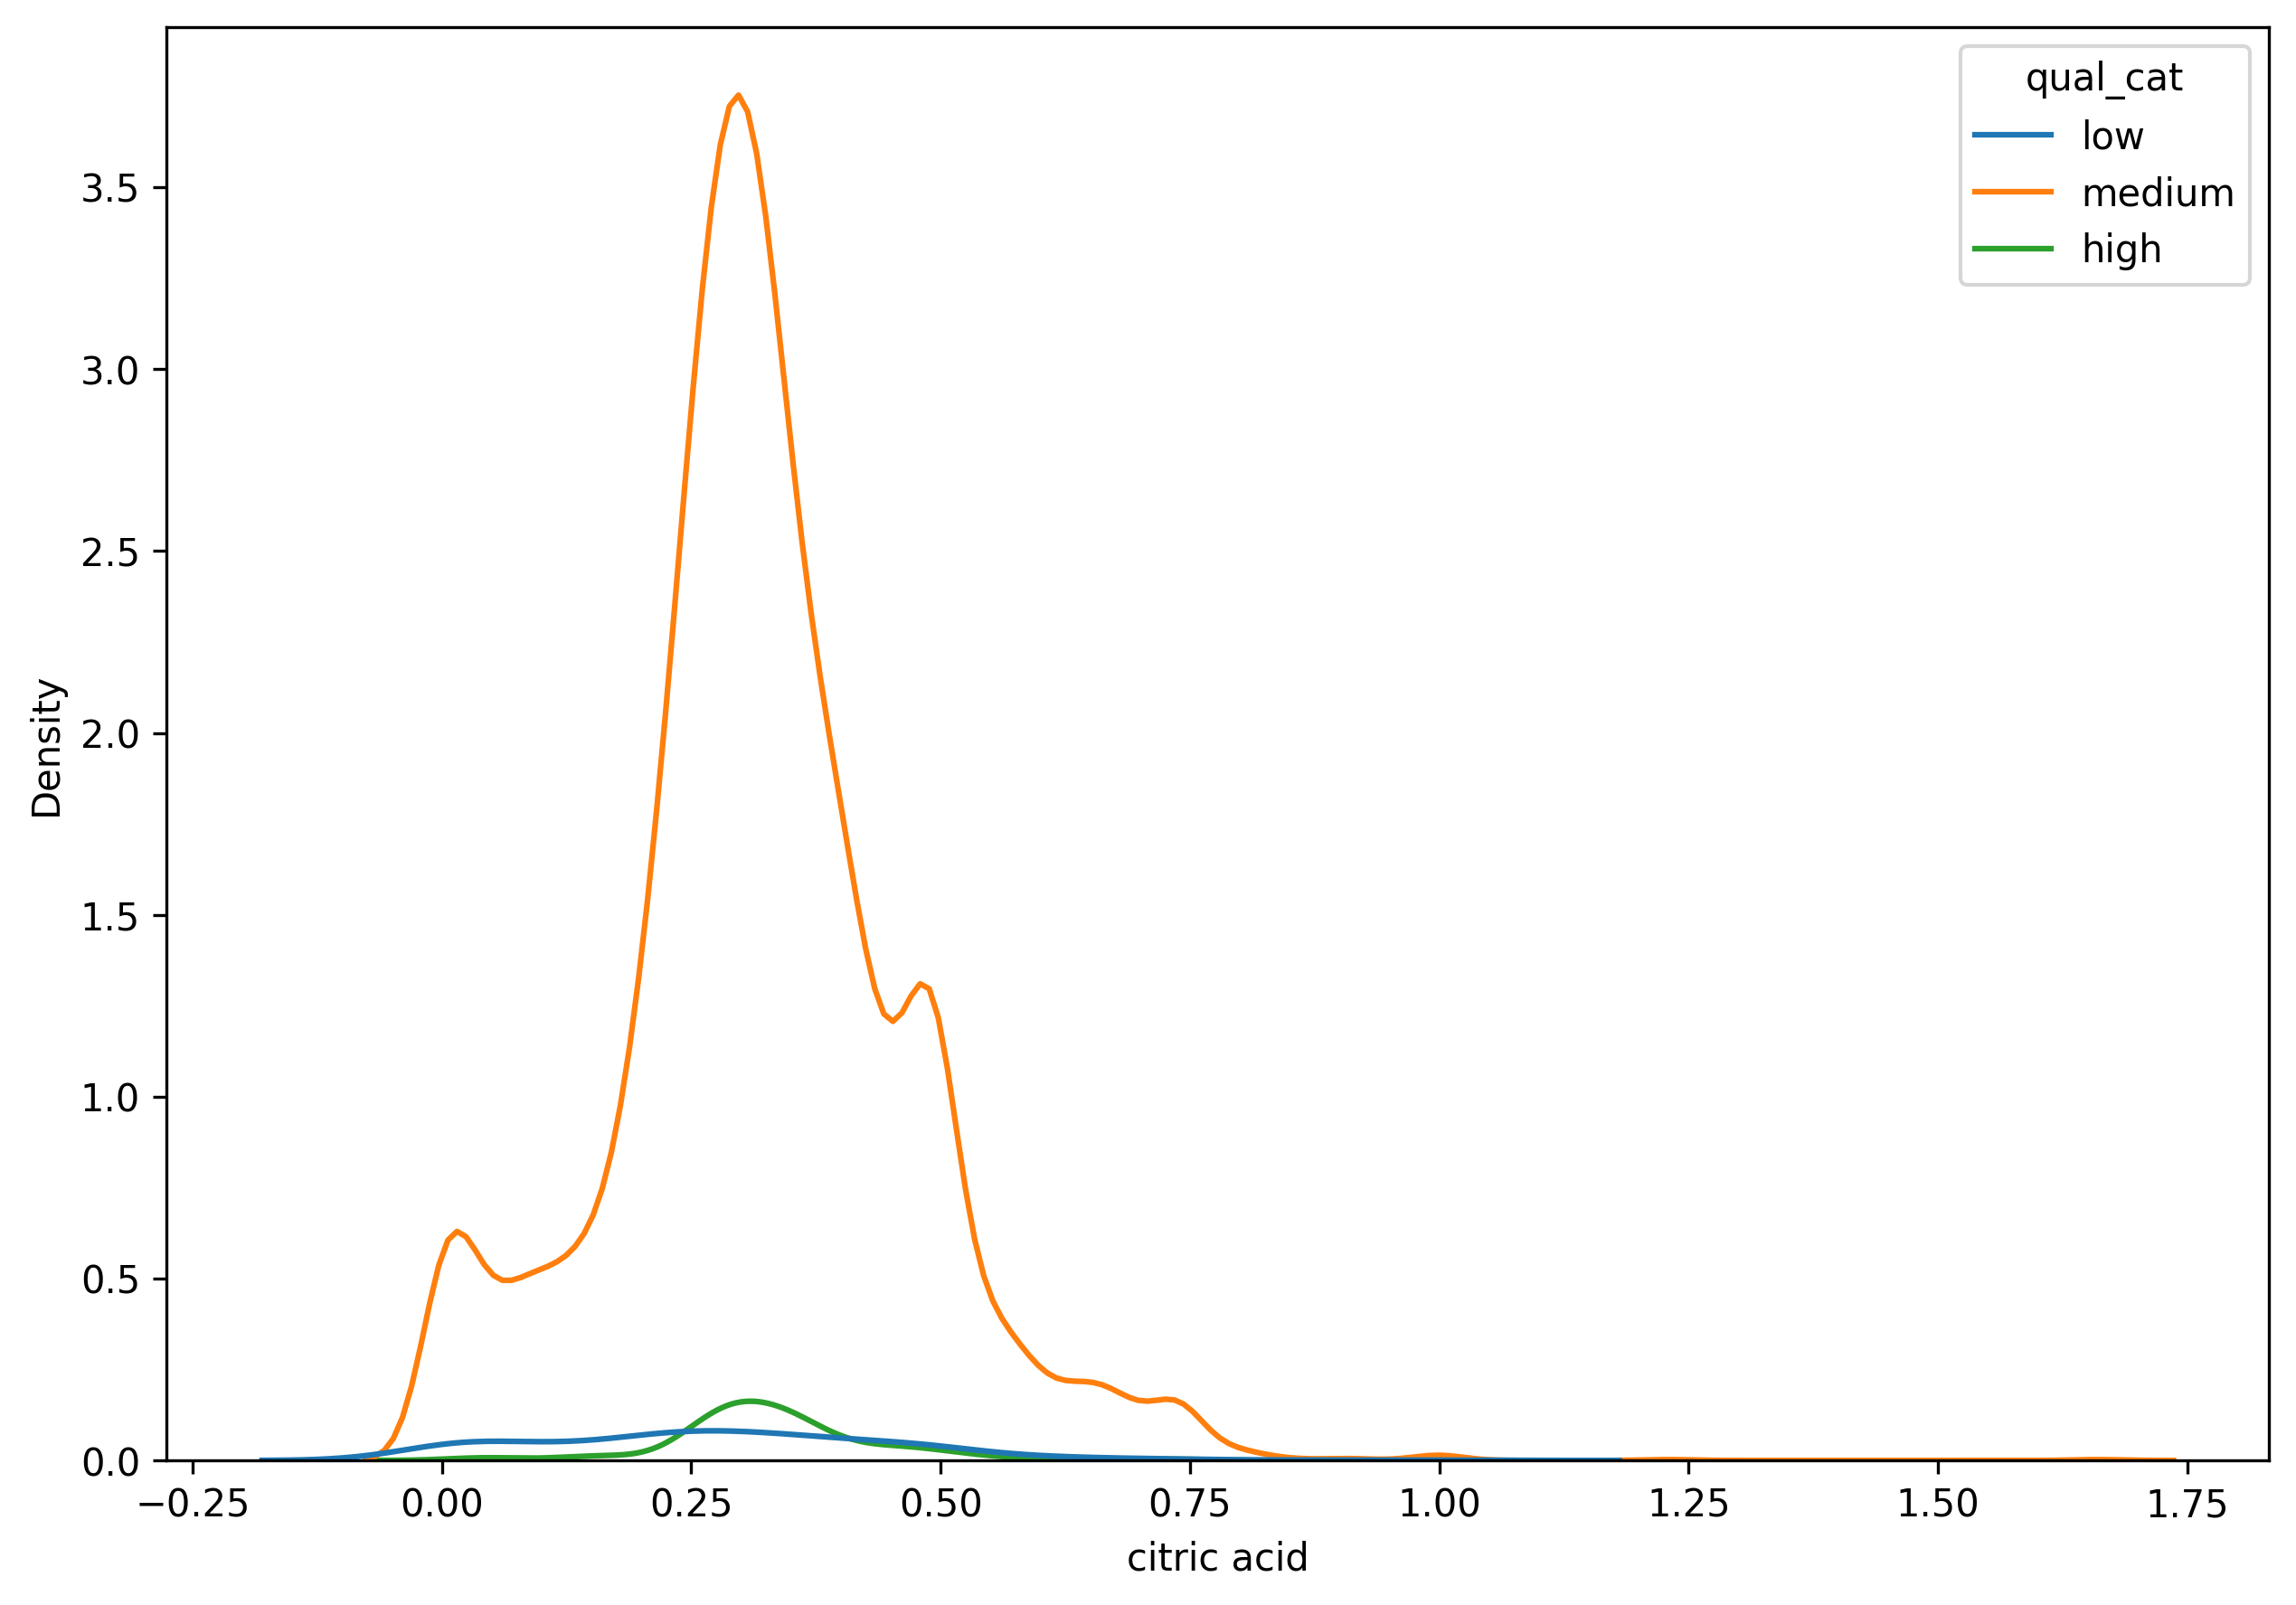

In [254]:
fig, ax = plt.subplots(figsize = (10,7))

sns.kdeplot(data = df, x = dv, hue = group)

plt.show()

In [255]:
pg.normality(df, dv = dv, group = group)

c:\users\derevirn\miniconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
low,0.963554,6.577909e-06,False
medium,0.964488,3.739601e-36,False
high,0.924553,1.452201e-08,False


In [256]:
pg.kruskal(df, dv = var, between = group)

,Source,ddof1,H,p-unc
Kruskal,qual_cat,2,169.571828,1.506417e-37


In [257]:
pg.pairwise_ttests(df, dv = var, between = group,
                   parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,qual_cat,low,medium,False,False,657269.0,two-sided,1.796269e-03,-0.240043
1,qual_cat,low,high,False,False,8863.5,two-sided,9.400764e-31,-1.331996
2,qual_cat,medium,high,False,False,286322.5,two-sided,5.227937e-36,-1.040191
